In [4]:
from numerics.idling_experiment import IdlingExperiment
from main.compiling.NoiseModel import PhenomenologicalNoise
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [5]:
def calculate_ler(per,mer, distance,n_runs):
    noise_model = PhenomenologicalNoise(per, mer)
    exp = IdlingExperiment('RotatedSurfaceCode', distance, noise_model)
    return(exp.calculate_ler(n_runs))

def calculate_ler_array(per_array, mer_array, distance_array,n_runs):
    ler_dict = dict()
    for d in distance_array:
        ler_dict[d] = dict()
        for index, per in enumerate(per_array):
            ler_dict[d][per] = calculate_ler(per, mer_array[index], d,n_runs)

    return(ler_dict)

In [6]:
def plot_ler(ler_dict):
    for distance in ler_dict:
        per_array = []
        ler_array = []
        for per in ler_dict[distance]:
            ler_array.append(ler_dict[distance][per])
            per_array.append(per)
        plt.plot(per_array,ler_array, 'o',label = 'd =' + str(distance))
    plt.yscale("log")
    plt.legend()


In [7]:
def calculate_threshold(per_mer_ratio, n_runs, min_per, max_per):
#    per_array_1 = np.arange(0.0005,0.01, 0.002)
#    per_array_2 = np.arange(0.01, 0.06, 0.005)
    per_array = np.linspace(min_per,max_per, 10)#np.hstack((per_array_1,per_array_2))
    mer_array = per_mer_ratio*per_array
    ler_dict = calculate_ler_array(per_array,mer_array,  np.arange(9, 22, 4), n_runs)
    return(ler_dict)

In [8]:
ler_dict_10 = calculate_threshold(10,10)
print(ler_dict_10)
plot_ler(ler_dict_10)

TypeError: calculate_threshold() missing 2 required positional arguments: 'min_per' and 'max_per'

In [9]:
ler_dict_1 = calculate_threshold(1)
print(ler_dict_1)
plot_ler(ler_dict_1)

TypeError: calculate_threshold() missing 3 required positional arguments: 'n_runs', 'min_per', and 'max_per'

In [10]:
ler_dict_5 = calculate_threshold(5)
print(ler_dict_5)
plot_ler(ler_dict_5)

TypeError: calculate_threshold() missing 3 required positional arguments: 'n_runs', 'min_per', and 'max_per'

In [11]:
def threshold_fit(variables, B0, B1, B2, mu, pth):
    p, L = variables
    return(B0 + B1*(p-pth)*pow(L, 1/mu) + B2*pow((p-pth) * pow(L, 1/mu), 2))


def get_threshold(code_dicts, min_per=0, max_per=1, distance=[5, 7, 9]):
    per_data = []
    ler_data = []
    d_data = []
    for distance in code_dicts.keys():
        print(distance)
        ler_data.extend([code_dicts[distance][per]
                        for per in code_dicts[distance]])
        per_data.extend([per for per in code_dicts[distance]])
        d_data.extend([distance for _ in range(len(code_dicts[distance]))])

    popt, pcov = curve_fit(
        threshold_fit, (per_data, d_data), ler_data, maxfev=20000)  # sigma deleted
    threshold = popt[-1]
    return(popt[-1])


"""
per_data is a 1d np.array of physical error rates
d_data is a 1d np.array of distances
ler_data is a 1d np.array of logical error rates
for example:
per_data =np.array([0.03,0.05,0.07,0.03,0.05,0.07,0.03,0.05,0.07])
ler_data = np.array([0.01,0.04,0.1,0.005,0.03,0.12,0.002,0.025,0.15])
d_data = np.array([3,3,3,5,5,5,7,7,7])
"""


'\nper_data is a 1d np.array of physical error rates\nd_data is a 1d np.array of distances\nler_data is a 1d np.array of logical error rates\nfor example:\nper_data =np.array([0.03,0.05,0.07,0.03,0.05,0.07,0.03,0.05,0.07])\nler_data = np.array([0.01,0.04,0.1,0.005,0.03,0.12,0.002,0.025,0.15])\nd_data = np.array([3,3,3,5,5,5,7,7,7])\n'

In [18]:
n_runs =500
thresholds = dict()
ler_dict = dict()


9
13
17
21
{1: 0.03682575794418057}


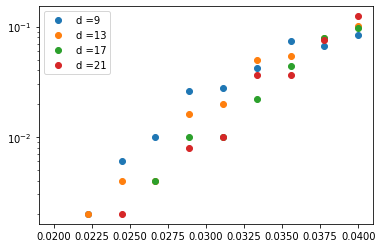

In [19]:
ratio = 1
ler_dict[ratio] = calculate_threshold(ratio, n_runs, 0.02, 0.04)
thresholds[ratio] = get_threshold(ler_dict[ratio])
plot_ler(ler_dict[ratio])
print(thresholds)

In [314]:
for ratio in [1,2,3]:
    ler_dict[ratio] = calculate_threshold(ratio, n_runs, 0.025, 0.035)
    thresholds[ratio] = (get_threshold(ler_dict[ratio]))

    print(thresholds)

9
13
17
21
{1: 0.06636979971864788}


KeyboardInterrupt: 

In [299]:
n_runs=5000
for ratio in np.arange(4,7):
    ler_dict[ratio] = calculate_threshold(ratio, n_runs, 0.005, 0.03)
    thresholds[ratio] = (get_threshold(ler_dict[ratio]))


KeyboardInterrupt: 

In [ ]:
ratios = thresholds.keys()
ler = thresholds.values()


Text(0, 0.5, 'threshold (data qubit error rate)')

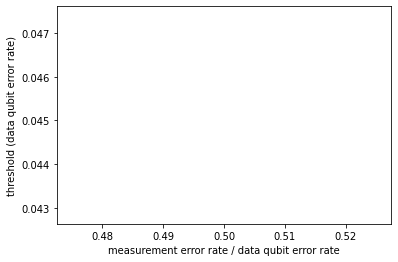

In [ ]:
plt.plot(ratios, ler)
plt.xlabel('measurement error rate / data qubit error rate')
plt.ylabel('threshold (data qubit error rate)')

In [ ]:
print(ler_dict)
#plot_ler(ler_dict)


KeyError: 1

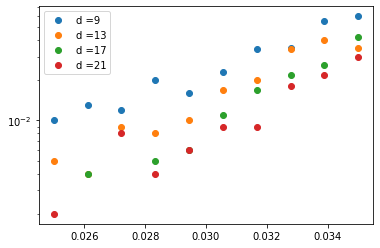

In [316]:
plot_ler(ler_dict[1])